# Practice Session 08: Robustness¶

Many complex systems display a surprising degree of tolerance against errors. For example, relatively simple organisms grow, persist and reproduce despite drastic pharmaceutical or environmental interventions, an error tolerance attributed to the robustness of the underlying metabolic network1. Complex communication networks2 display a surprising degree of robustness: although key components regularly malfunction, local failures rarely lead to the loss of the global information-carrying ability of the network. The stability of these and other complex systems is often attributed to the redundant wiring of the functional web defined by the systems' components. Here we demonstrate that error tolerance is not shared by all redundant systems: it is displayed only by a class of inhomogeneously wired networks, called scale-free networks, which include the World-Wide Web, the Internet, social networks and cells. We find that such networks display an unexpected degree of robustness, the ability of their nodes to communicate being unaffected even by unrealistically high failure rates. However, error tolerance comes at a high price in that these networks are extremely vulnerable to attacks (that is, to the selection and removal of a few nodes that play a vital role in maintaining the network's connectivity). Such error tolerance and attack vulnerability are generic properties of communication networks

(Albert, R., Jeong, H. & Barabási, AL. Error and attack tolerance of complex networks. _Nature_ 406, 378–382 (2000). https://doi.org/10.1038/35019019)

Identification information

**Author:** Jose Giner

**Date:** 28/03/2022

## 1. Percolation

Create a regular grid to check the percolation properties. Generate a network in a 2d grid with nodes in positions $(x,y)$ with a probability $p$. Obtain the largest cluster also and plot them. 


In [1]:
# generation of a 2d grid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm



# shows the complete grid as reference
def background(n):
    G = nx.grid_2d_graph(n,n)
    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    nx.draw(G, pos = pos,
        node_color=(0.8, 0.8, 0.8),
        #edge_color=[0.8, 0.8, 0.8],
        node_size=100)
    

# identify largest connected component
def connected(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    nx.draw(G0, pos = pos,
        node_color='r', node_size=100)


n = 20
G = nx.grid_2d_graph(n,n)
pos = {(x,y):(y,-x) for x,y in G.nodes()}

# eliminate nodes for a (1-p) probability
# for example: if you want a p=0.1 of nodes, remove 0.9
p = 0.1
n_to_remove = int(np.round(n*n * (1 - p)))
list_of_nodes = np.random.permutation(G.nodes())
list_of_nodes = list_of_nodes[0:n_to_remove,:]

# remove_nodes_from() does not work directlñy with a 2d_grid
for node in list_of_nodes:
    G.remove_node(tuple(node))

fig = plt.figure()
background(n)
nx.draw(G, pos = pos,
        node_color='b', node_size=100)
connected(G)

Calculate the average size of the all the clusters $\langle s \rangle$ depending on the probability $p$
- generate grids with probs from 0 to 1
- obtain all the clusters
- calculate the average size
- plot them

C:\Users\Jose Giner\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Jose Giner\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


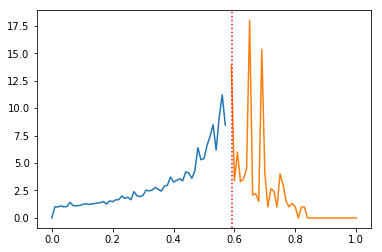

In [3]:
s = []
pinf = []
prob = np.linspace(0,1,101)
pc = 0.593
n = 20
G = nx.grid_2d_graph(n,n)
pos = {(x,y):(y,-x) for x,y in G.nodes()}

# to improve: repeat several times for the same prob and calculate the average value
for p in prob:
    # copy the complete grid
    Gp = G.copy()
    # remove the nodes
    n_to_remove = int(np.round(n*n * (1 - p)))
    list_of_nodes = np.random.permutation(Gp.nodes())
    list_of_nodes = list_of_nodes[0:n_to_remove,:]
    for node in list_of_nodes:
        Gp.remove_node(tuple(node))
    # obtain the cluster size
    comp_sizes = [len(c) for c in sorted(nx.connected_components(Gp), key=len, reverse=True)]
    # remove largest one in the second half
    start_at = 0 if p < pc else 1
    # add the mean cluster size
    s.append(np.mean(comp_sizes[start_at:]))
    # add the prob to belong to the largest cluster
    pinf.append(0 if len(comp_sizes) == 0 else comp_sizes[0] / Gp.number_of_nodes())
    
# replace nan by zero
s = [0 if np.isnan(i) else i for i in s] 
plt.plot(prob[:58],s[:58])
plt.plot(prob[59:],s[59:])
plt.axvline(x=pc, color='red', linestyle='dotted')
plt.show()

And also the probability to belong to the largest cluester, $P_\infty$

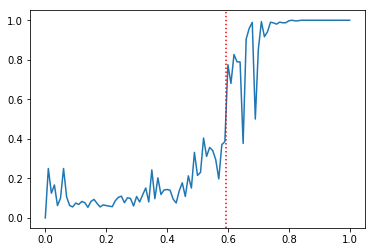

In [4]:
plt.plot(prob,pinf)
plt.axvline(x=pc, color='red', linestyle='dotted')
plt.show()

## 2. Robustness

Inverse percolation: remove nodes until disconnected. Plot the network in three intermediate steps

100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1400.77it/s]


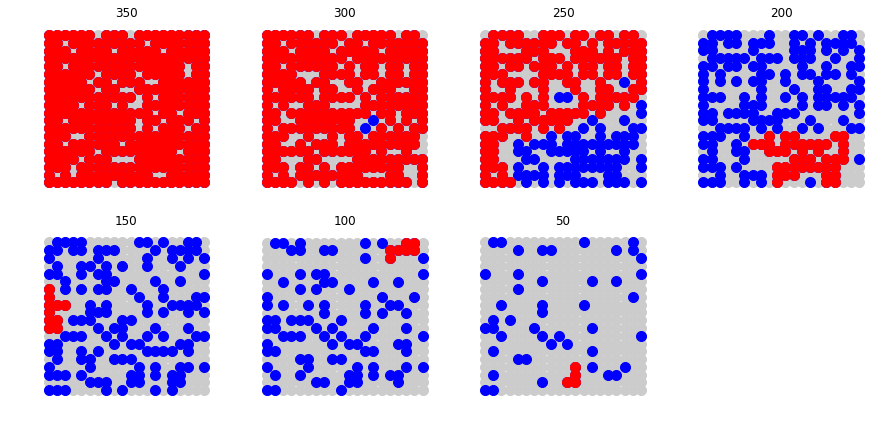

In [92]:
#your code here
Grob = G.copy()
remove = np.random.permutation(Grob.nodes())

# remove_nodes_from() does not work directlñy with a 2d_grid
plt.figure(figsize=(15,7))
for i in tqdm(range(n*n)):
    rest = i % 50
    if rest == 0 and i > 0:
        plt.subplot(2,4,int(i / 50))
        background(n)
        nx.draw(Grob, pos = pos,
            node_color='b', node_size=100)
        connected(Grob)
        plt.title(Grob.number_of_nodes())
    Grob.remove_node(tuple(remove[i,:]))




Calculate and plot how the efficiency of the graph decreases when random nodes are deleted
- use `global_efficiency()` function to calculate the efficiency of the graph
- remove nodes at random one by one and recalculate the efficiency each time (save the value on a list)
- normalize the efficiency dividing by the hisst one (first value over the complete graph)
- plot the evolucion of the efficiency

In [ ]:
# your code here
eff = []
Geff = G.copy()

# random order for deletion
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(n*n)):
    # calculate the global efficiency of the remaining graph
    eff.append(nx.global_efficiency(Geff))
    # remove the next random node
    Geff.remove_node(tuple(remove[i,:]))



  2%|▏         | 8/400 [02:44<2:13:04, 20.37s/it]

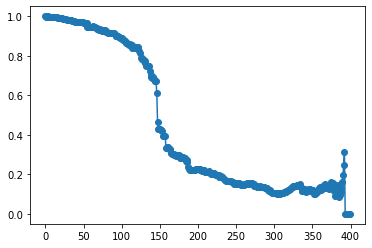

In [6]:
plt.plot(np.array(eff) / eff[0], 'o-')
plt.show()

Calculate the efficiency of a random network and a barabasi-albert one. Plot the three values in the same graphic. Are there differences?

Grid network (10 x 10)

In [101]:
n = 10
G = nx.grid_2d_graph(n,n)

eff_gr = []
Geff = G.copy()

# random order for deletion
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(n*n)):
    eff_gr.append(nx.global_efficiency(Geff))
    Geff.remove_node(tuple(remove[i,:]))


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.48it/s]


Random graph with n = 100 and p = 0.1

In [65]:
# your code here
G = nx.erdos_renyi_graph(100,0.1)

eff_er = []
Geff = G.copy()

# random order for deletion
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(G.number_of_nodes())):

    Geff.remove_nodes_from(remove[:i])

    eff_er.append(nx.global_efficiency(Geff))

    Geff = G.copy()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.49it/s]


Barabasi network with n = 100, m = 2

In [66]:
G_bar = nx.barabasi_albert_graph(100, 2)

eff_b = []
Geff = G_bar.copy()

# random order for deletion
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(len(G_bar))):
    
    Geff.remove_nodes_from(remove[:i])
    eff_b.append(nx.global_efficiency(Geff))

    Geff = G_bar.copy()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.67it/s]


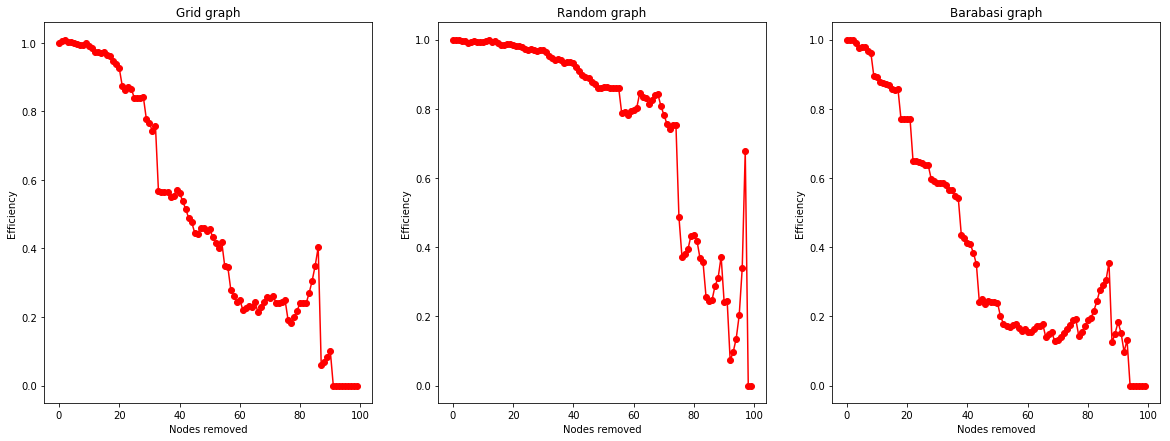

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

ax1.plot(np.array(eff_gr) / eff_gr[0], 'o-', c = 'r')
ax1.set(xlabel='Nodes removed', ylabel='Efficiency')
ax1.set_title('Grid graph')

ax2.plot(np.array(eff_er) / eff_er[0], 'o-', c = 'r')
ax2.set(xlabel='Nodes removed', ylabel='Efficiency')
ax2.set_title('Random graph')

ax3.plot(np.array(eff_b) / eff_b[0], 'o-', c = 'r')
ax3.set(xlabel='Nodes removed', ylabel='Efficiency')
ax3.set_title('Barabasi graph')

plt.show()

Efficiency in Grid and Barabasi graphs drops significantly more in earlier steps with few nodes removed than in the random graph.

## 3. Deliberate attack
Repeat the analysis but now remove the nodes with higher degree first. Solve randomly ties. Which are the differences with the random failures

In [114]:
# your code here


G = nx.erdos_renyi_graph(100,0.1)

# Degree value order for deletion
nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
remove = []
for n,d in nodes:
    remove.append(n)

eff_er = []
Geff = G.copy()


for i in tqdm(range(G.number_of_nodes())):

    Geff.remove_nodes_from(remove[:i])

    eff_er.append(nx.global_efficiency(Geff))

    Geff = G.copy()   
    
    
    
    

G_bar = nx.barabasi_albert_graph(100, 2)

# Degree value order for deletion
nodes = sorted(G_bar.degree, key=lambda x: x[1], reverse=True)
remove = []
for n,d in nodes:
    remove.append(n)


eff_b = []
Geff = G_bar.copy()


for i in tqdm(range(len(G_bar))):
    
    Geff.remove_nodes_from(remove[:i])
    eff_b.append(nx.global_efficiency(Geff))

    Geff = G_bar.copy()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.17it/s]


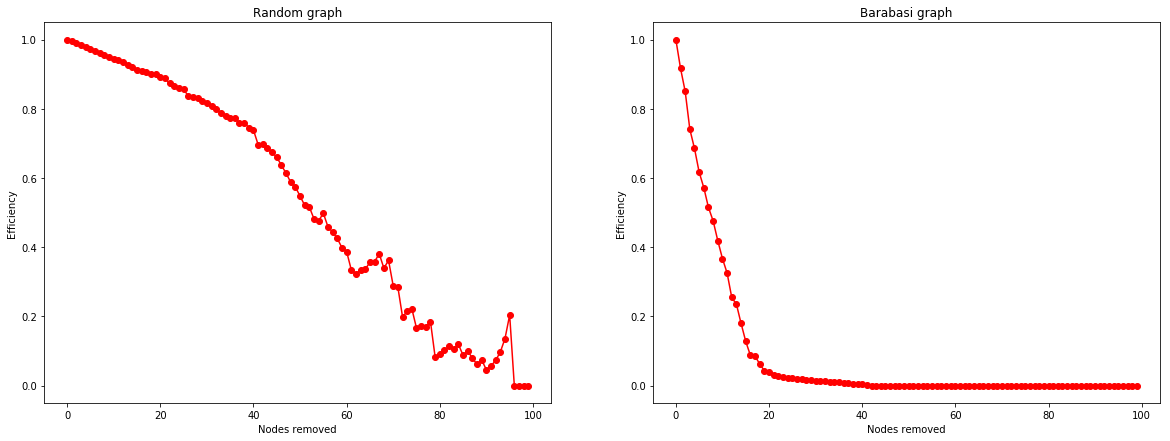

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))


ax1.plot(np.array(eff_er) / eff_er[0], 'o-', c = 'r')
ax1.set(xlabel='Nodes removed', ylabel='Efficiency')
ax1.set_title('Random graph')

ax2.plot(np.array(eff_b) / eff_b[0], 'o-', c = 'r')
ax2.set(xlabel='Nodes removed', ylabel='Efficiency')
ax2.set_title('Barabasi graph')

plt.show()

Barabasi graphs are much more vulnerable to deliberate attacks than random graphs because earlier removal of high degree nodes (or hubs) can increase by far the path length between remaining nodes, meaning that efficiency decreases drastically.

## 4. Cascades

Cascade failure is a critical phenomenon in networks. Node failure is not independent and is affected by the state of its neighbors.

To simulate a cascade, choose a random netowrk and marked it as damaged. In each step, all nodes with a determined proportion of damaged neighbors are alse damaged. Colour damaged nodes in red. Plot the total number of damaged nodes in each step. 

Repeat it with different initial nodes, different proportion of damaged neighbors, and compare random and scale-free networks. Try to obtain samples
- critical $\langle k \rangle = 1$
- subcritical $\langle k \rangle < 1$
- supercritical $\langle k \rangle > 1$


Step 1
Damaged nodes: 1


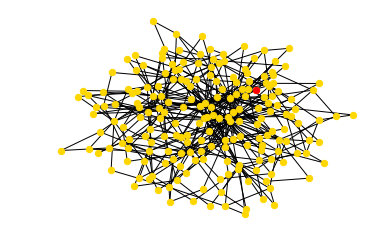

Step 2
Damaged nodes: 4


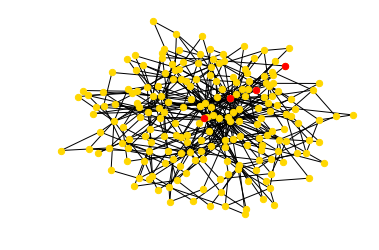

Step 3
Damaged nodes: 41


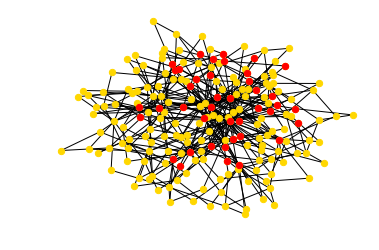

Step 4
Damaged nodes: 132


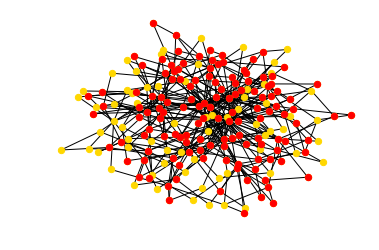

Step 5
Damaged nodes: 197


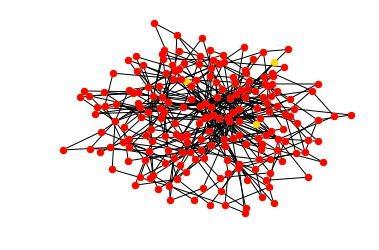

In [4]:
# your code here
n = 200
G = nx.barabasi_albert_graph(n,2)
pos = nx.spring_layout(G)



# start with one randomdamaged node
damaged = []

start_node = np.random.randint(n)
damaged.append(start_node)

steps = range(1,6)
for s in steps:
    plt.axes([0.5,0.5,0.75,0.75])
    print('Step {}'.format(s))
    print('Damaged nodes: {}'.format(len(set(damaged))))
    nx.draw(G,pos=pos, node_color = 'gold', node_size = 40)
    nx.draw_networkx_nodes(G.subgraph(damaged),pos=pos,node_color='red', node_size = 40)
    
    frontier = []
    for node in set(damaged):
        frontier = frontier + [n for n in G.neighbors(node)]
    for node in set(frontier):
        damaged.append(node)
 
    
    plt.show()

# sugerence: use damaged to keep the old damaged nodes and a 'frontier' for the lastly added ones


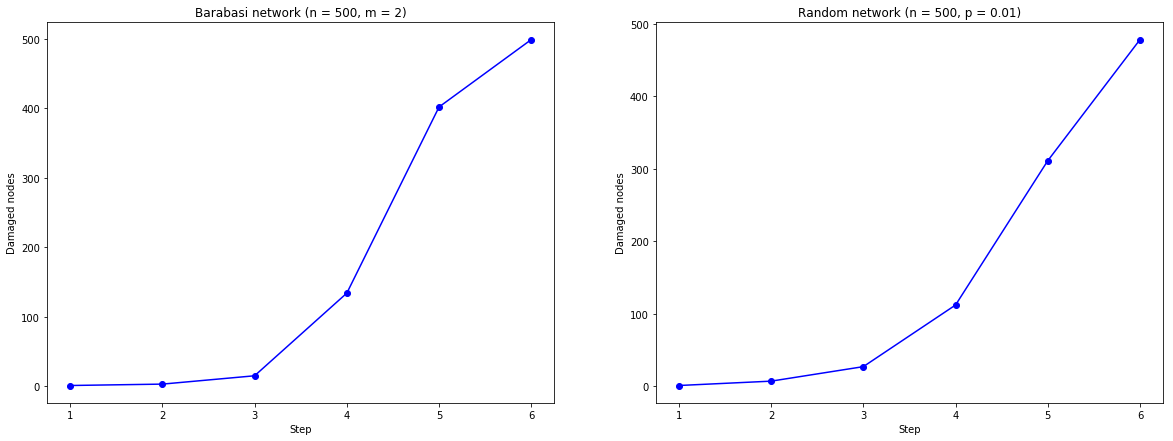

In [14]:
#Barabasi graph
n = 500
m = 2
G = nx.barabasi_albert_graph(n,m)

damaged = []
total_dam_bar = []
start_node = np.random.randint(n)
damaged.append(start_node)

steps = list(range(1,7))
for s in steps:
    num_dam_bar = len(set(damaged))
    total_dam_bar.append(num_dam_bar)

    frontier = []
    for node in set(damaged):
        frontier = frontier + [n for n in G.neighbors(node)]
    for node in set(frontier):
        damaged.append(node)


#Random graph
p = 0.01
G = nx.erdos_renyi_graph(n,p)

damaged = []
total_dam_er = []
start_node = np.random.randint(n)
damaged.append(start_node)

steps = list(range(1,7))
for s in steps:
    num_dam_er = len(set(damaged))
    total_dam_er.append(num_dam_er)

    frontier = []
    for node in set(damaged):
        frontier = frontier + [n for n in G.neighbors(node)]
    for node in set(frontier):
        damaged.append(node)


        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.plot(steps,total_dam_bar, 'o-', c = 'b')
ax1.set_title('Barabasi network (n = {}, m = {})'.format(n,m))
ax1.set(xlabel = 'Step')
ax1.set(ylabel='Damaged nodes')

ax2.plot(steps,total_dam_er, 'o-', c = 'b')
ax2.set_title('Random network (n = {}, p = {})'.format(n,p))
ax2.set(xlabel = 'Step')
ax2.set(ylabel='Damaged nodes')

plt.show()

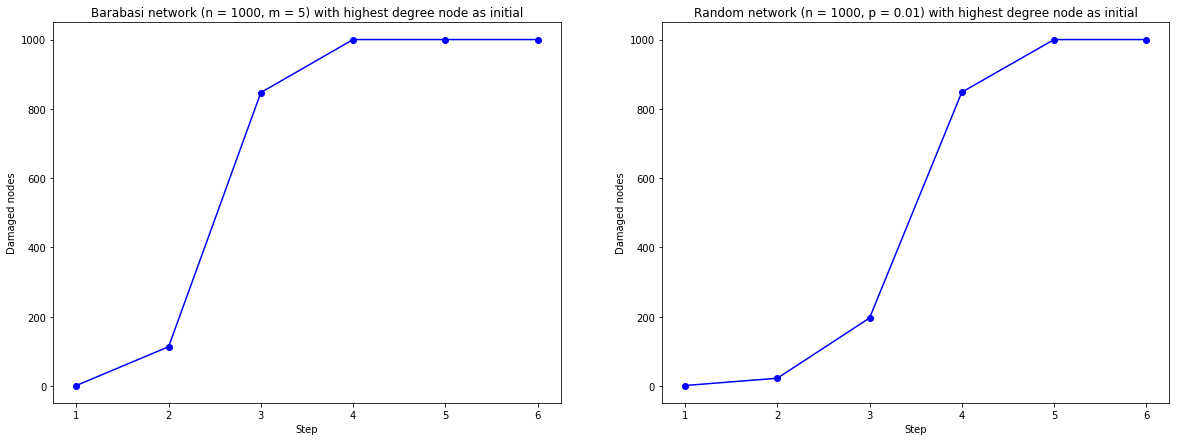

In [15]:
#Barabasi graph
n,m = 1000,5
G = nx.barabasi_albert_graph(n,m)

nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)

damaged = []
total_dam_bar = []
start_node = nodes[0][0]
damaged.append(start_node)

steps = list(range(1,7))
for s in steps:
    num_dam_bar = len(set(damaged))
    total_dam_bar.append(num_dam_bar)

    frontier = []
    for node in set(damaged):
        frontier = frontier + [n for n in G.neighbors(node)]
    for node in set(frontier):
        damaged.append(node)

        
#Random graph
p = 0.01
G = nx.erdos_renyi_graph(n,p)
nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)

damaged = []
total_dam_er = []
start_node = nodes[0][0]
damaged.append(start_node)

steps = list(range(1,7))
for s in steps:
    num_dam_er = len(set(damaged))
    total_dam_er.append(num_dam_er)

    frontier = []
    for node in set(damaged):
        frontier = frontier + [n for n in G.neighbors(node)]
    for node in set(frontier):
        damaged.append(node)
        
        

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.plot(steps,total_dam_bar, 'o-', c = 'b')
ax1.set_title('Barabasi network (n = {}, m = {}) with highest degree node as initial'.format(n,m))
ax1.set(xlabel = 'Step')
ax1.set(ylabel='Damaged nodes')

ax2.plot(steps,total_dam_er, 'o-', c = 'b')
ax2.set_title('Random network (n = {}, p = {}) with highest degree node as initial'.format(n,p))
ax2.set(xlabel = 'Step')
ax2.set(ylabel='Damaged nodes')

plt.show()


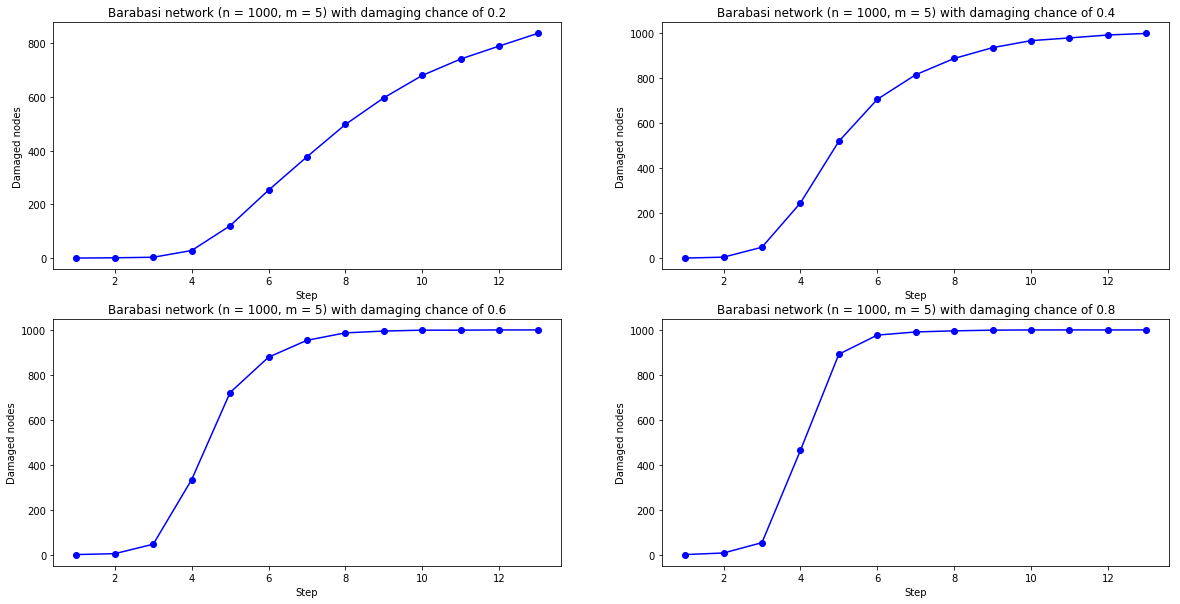

In [44]:
import random

#Barabasi graph

n,m = 1000,5
G = nx.barabasi_albert_graph(n,m)

probs_damaged = [0.2,0.4,0.6,0.8]
results = []

steps = list(range(1,14))
for p_dam in probs_damaged:
    damaged = []
    total_dam = []
    start_node = np.random.randint(n)
    damaged.append(start_node)
    for s in steps:
        num_dam_bar = len(set(damaged))
        total_dam.append(num_dam_bar)

        frontier = []
        for node in set(damaged):
            frontier = frontier + [n for n in G.neighbors(node)]
        for node in set(frontier):
            prob = random.random()
            if prob < p_dam:
                damaged.append(node)
    
    results.append(total_dam)
           
        

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes_list = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]]


for i in range(len(probs_damaged)):
    axes_list[i].plot(steps,results[i], 'o-', c = 'b')
    axes_list[i].set_title('Barabasi network (n = {}, m = {}) with damaging chance of {}'.format(n,m,str(probs_damaged[i])))
    axes_list[i].set(xlabel = 'Step')
    axes_list[i].set(ylabel='Damaged nodes')
    

plt.show()


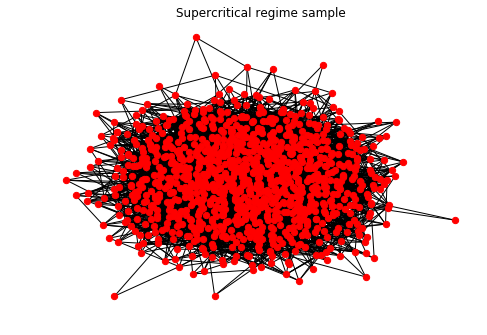

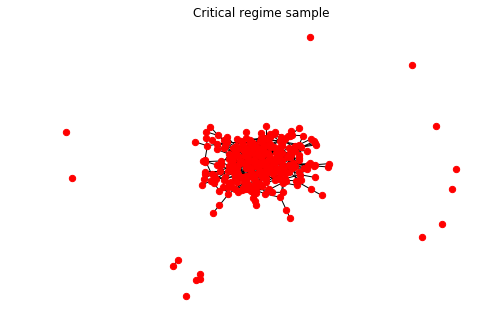

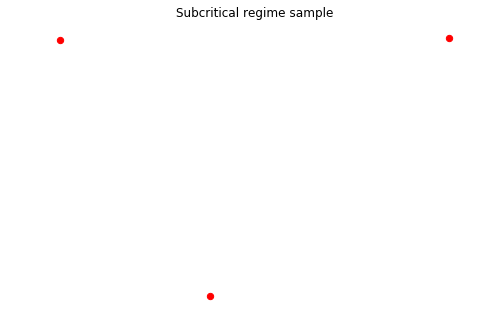

[]

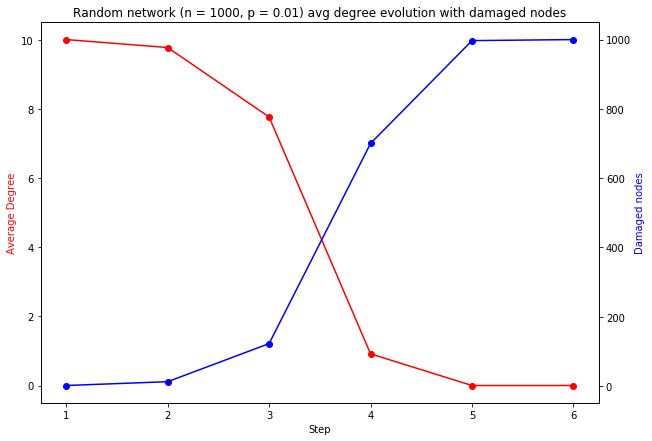

In [32]:
#Random graph
p = 0.01
n = 1000
G = nx.erdos_renyi_graph(n,p)

damaged = []
grados_medios,total_damaged = [],[]
regimes = {'supercritical': False, 'critical':False, 'subcritical': False}
start_node = np.random.randint(n)
damaged.append(start_node)

steps = list(range(1,7))
G2 = G.copy()
for s in steps:
    
    total_damaged.append(len(set(damaged)))
    G2.remove_nodes_from(list(set(damaged)))
    g_med = (2 * G2.number_of_edges()) / n
    if round(g_med) > 1 and not(regimes['supercritical']):
        nx.draw(G2,node_size = 40)
        plt.title('Supercritical regime sample')
        plt.show()
        regimes['supercritical'] = True
    
    if round(g_med) == 1 and not(regimes['critical']):
        nx.draw(G2,node_size = 40)
        plt.title('Critical regime sample')
        plt.show()
        regimes['critical'] = True
    
    if round(g_med) < 1 and not(regimes['subcritical']):
        nx.draw(G2,node_size = 40)
        plt.title('Subcritical regime sample')
        plt.show()
        regimes['subcritical'] = True
    
    grados_medios.append(g_med)
    
    frontier = []
    G2 = G.copy()
    for node in set(damaged):
        frontier = frontier + [n for n in G2.neighbors(node)]
    for node in set(frontier):
        damaged.append(node)
    
    

fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

ax1.plot(steps,grados_medios, 'o-', c = 'r')
ax2.plot(steps,total_damaged, 'o-', c = 'b')
ax1.set_title('Random network (n = {}, p = {}) avg degree evolution with damaged nodes'.format(n,p))
ax1.set_xlabel('Step')
ax1.set_ylabel('Average Degree', color = 'r')
ax2.set_ylabel('Damaged nodes', color = 'b')
plt.plot()

## 5. Deliverable

1. analyze the efficiency of valenbici. Compare the network of the stations (delaunay) with the network generated by the trips.

2. Simulate a cascade failure
    - Choose randomly a station and block it
    - when a trip starts in a blocked station, discard it
    - when a trip ends in a blocked station, send it to a random neighbor (repeat until you find a non-blocked one)
    - if an station has no free slots, blockit
    - plot the evolution of the number of blocked stations
    - plot the graph using colors for blocked / unblocked stations and show its evolution

In [5]:
import json
import pandas as pd
data = json.load(open('C:\\Users\\Jose Giner\\OneDrive\\Escritorio\\SNA\\session-8\\data\\stations.json', encoding = 'utf-8') )


features = data["features"]
new_data = []
for f in features:
    prop = f['properties']
    geom = f['geometry']
    prop.update(geom)
    new_data.append(prop)

    
stations_df = pd.DataFrame.from_dict(new_data)
stations_df

,address,available,coordinates,free,name,number,open,ticket,total,type,updated_at
0,Plaza de la Virgen - Bailía,18,"[725755.944, 4372972.613]",6,004_PLAZA_DE_LA_VIRGEN_CALLE_BAILIA,4,T,T,25,Point,29/06/2016 10:43:20
1,Plaza Poeta Llorente,4,"[726116.944, 4372999.585]",11,005_PINTOR_LOPEZ_PZA_POETA_LLORENTE,5,T,T,15,Point,29/06/2016 10:43:20
2,Guillem de Castro - San Pedro Pascual,0,"[725016.729, 4372512.385]",15,006_GUILLEN_CASTRO_CON_CALLE_SAN_PEDRO_PASCUAL,6,T,T,15,Point,29/06/2016 10:43:20
3,Plaza del Mercado - Taula de Canvis,9,"[725431.405, 4372754.855]",11,007_PZA_DEL_MERCADO_TAULA_DE_CANVIS,7,T,T,20,Point,29/06/2016 10:43:20
4,Plaza de Tetuán,8,"[726229.268, 4372720.676]",17,009_PLAZA_TETUAN_4,9,T,T,25,Point,29/06/2016 10:43:20
5,Xátiva - Bailén (Estación del Norte),8,"[725621.027, 4371937.812]",22,017_ESTACION RENFE I,17,T,T,30,Point,29/06/2016 10:43:20
6,Juan Llorens - Quart,2,"[724365.85, 4372668.04]",13,019_JUAN_LLORENS,19,T,F,15,Point,29/06/2016 10:43:20
7,Mediterráneo - Plaza Cruz de Cañamelar,0,"[729536.909, 4372108.482]",15,161_MEDITERRANEO,161,T,T,15,Point,29/06/2016 10:43:20
8,Armada Española - Mariano Cuber,17,"[729717.409, 4371628.874]",2,162_PZA. ARMADA ESPAÑOLA,162,T,F,19,Point,29/06/2016 10:43:20
9,Paseo Neptuno 32-34,7,"[730264.816, 4371737.667]",13,163_PASEO NEPTUNO,163,T,T,20,Point,29/06/2016 10:43:20


Station network using the Delaunay's triangulation

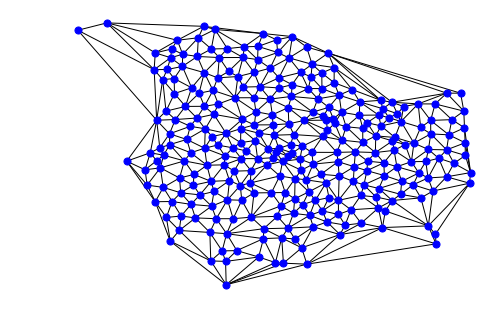

In [6]:
import scipy.spatial

def delaunay_graph(n, r, pos):
    G = nx.random_geometric_graph(n, r, pos = pos)
    latlon = nx.get_node_attributes(G,'pos')
    delTri = scipy.spatial.Delaunay(list(latlon.values()))
    for path in delTri.simplices:
        nx.add_path(G, path)
    return G

n=len(stations_df)
r = np.sqrt(np.log(n) / (np.pi * n)) * 1.5
dic_pos = {}
for i,coord in stations_df['coordinates'].items():
    dic_pos[i] = coord

G_stat = delaunay_graph(n, r, dic_pos)
latlon = nx.get_node_attributes(G_stat,'pos')
nx.draw(G_stat, pos=latlon,
        node_color='b', node_size=50)


Reading the trips file

In [7]:
trips_df = pd.read_excel('data/trips.xlsx')
trips_df.head()

,Borne de sortie,Date de sortie,Date de retour,Borne de retour
0,001_GUILLEN_DE_CASTRO,2016-10-10 05:45:40,2016-10-10 05:53:52,70_CALLE_COLON_ESQ_ALMIRANTE_ROGER_DE_LAURIA
1,001_GUILLEN_DE_CASTRO,2016-10-10 09:40:14,2016-10-10 09:45:10,010_CALLE_DEL_HOSPITAL_FRENTE_CALLE_HORNO_DEL_...
2,001_GUILLEN_DE_CASTRO,2016-10-10 13:39:03,2016-10-10 14:01:36,001_GUILLEN_DE_CASTRO
3,001_GUILLEN_DE_CASTRO,2016-10-10 14:02:03,2016-10-10 14:21:40,068_AVDA. DEL PUERTO IV
4,001_GUILLEN_DE_CASTRO,2016-10-10 15:09:12,2016-10-10 15:12:43,006_GUILLEN_CASTRO_CON_CALLE_SAN_PEDRO_PASCUAL


In [8]:
trips_df = trips_df[trips_df['Borne de retour'].notna()]
trips_df.isnull().sum()

Borne de sortie    0
Date de sortie     0
Date de retour     0
Borne de retour    0
dtype: int64

In [9]:
trips_df['Borne de sortie'] = trips_df['Borne de sortie'].str.strip()
trips_df['Borne de retour'] = trips_df['Borne de retour'].str.strip()

In [10]:
trips_df = trips_df[trips_df['Borne de sortie'].isin(stations_df['name'])]
trips_df = trips_df[trips_df['Borne de retour'].isin(stations_df['name'])]
len(trips_df)

22175

Trip network

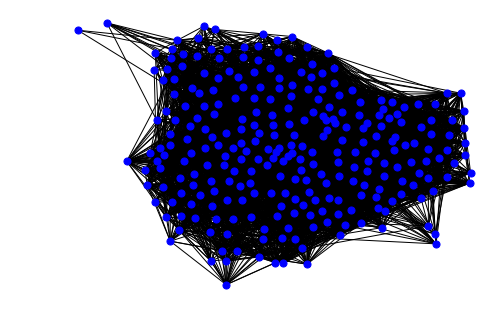

In [11]:
G_trips = nx.from_pandas_edgelist(trips_df , source='Borne de sortie', target='Borne de retour')

node_pos,free_d = {},{}
for i,row in stations_df.iterrows():
    station = row['name']
    
    coords = row['coordinates']
    node_pos[station] = coords
    
    free = row['free']
    free_d[station] = int(free)
    


nx.set_node_attributes(G_trips, free_d, "free slots")
nx.draw(G_trips, pos=node_pos,
        node_color='b', node_size=50)

The graph created from the trips file is denser than the Delaunay graph created from the stations file. 

### Efficiency analysis

In [131]:
#Stations network

eff_stat = []
Geff_stat = G_stat.copy()

# random order for deletion
remove = np.random.permutation(Geff_stat.nodes())
for i in tqdm(range(G_stat.number_of_nodes())):

    Geff_stat.remove_nodes_from(remove[:i])

    eff_stat.append(nx.global_efficiency(Geff_stat))

    Geff_stat = G_stat.copy()
    

#Trip network
eff_trips = []
Geff_trips = G_trips.copy()

# random order for deletion
remove = np.random.permutation(Geff_trips.nodes())
for i in tqdm(range(G_trips.number_of_nodes())):

    Geff_trips.remove_nodes_from(remove[:i])

    eff_trips.append(nx.global_efficiency(Geff_trips))

    Geff_trips = G_trips.copy()


100%|██████████| 275/275 [01:31<00:00,  3.00it/s]


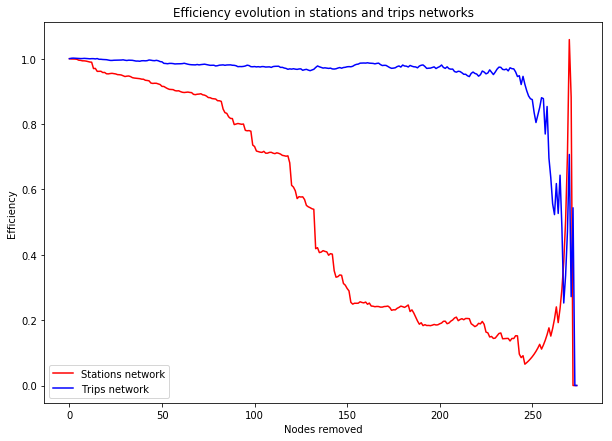

In [135]:
plt.figure(figsize = (10,7))
plt.plot(np.array(eff_stat) / eff_stat[0],  c = 'r', label = 'Stations network')
plt.plot(np.array(eff_trips) / eff_trips[0],  c = 'b', label = 'Trips network')
plt.xlabel('Nodes removed')
plt.ylabel('Efficiency')
plt.title('Efficiency evolution in stations and trips networks')
plt.legend()
plt.show()


Trips network is more robust than stations network due to the high amount of connections it has. 

### Cascade failure simulation (undirected version)

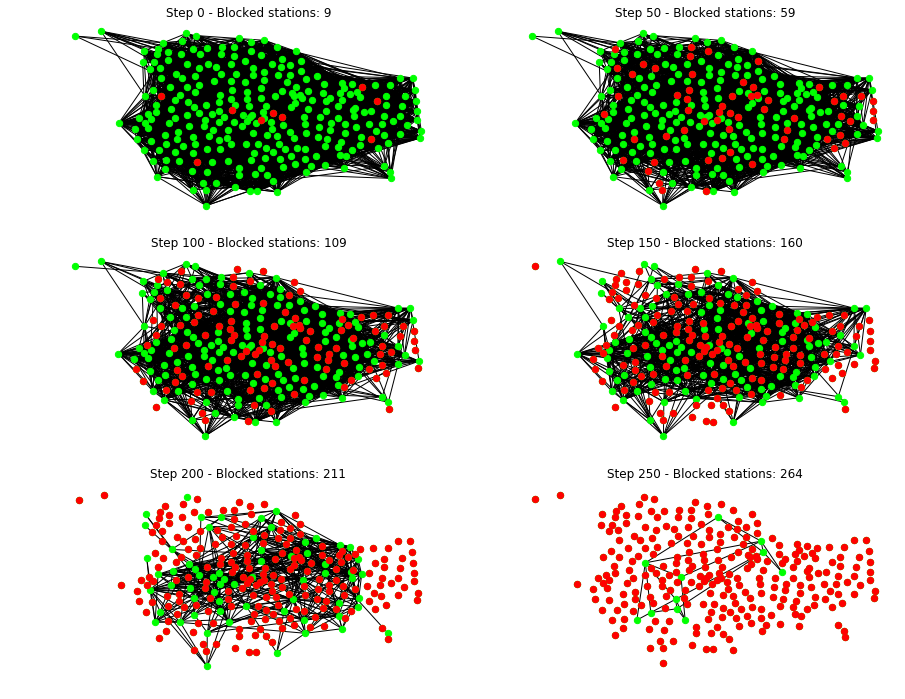

In [18]:
import random 

total_blocked = []
fig, axes = plt.subplots(3,2,figsize=(15,12))

axes_list = [axes[0][0],axes[0][1],axes[1][0],axes[1][1], axes[2][0], axes[2][1]]

#Blocking first the stations which have no free slots
blocked = [node for node in G_trips.nodes() if G_trips.node[node]['free slots'] == 0]
available_stat = list(n for n in G_trips.nodes() if n not in blocked)
total_blocked.append(len(blocked))

G_trips2 = G_trips.copy()
for b_node in blocked:
    G_trips2.remove_edges_from([(b_node,v) for v in G_trips2.neighbors(b_node)])

it,count_ax = 0, 0   
nx.draw(G_trips2,pos=node_pos, node_color = 'lime', node_size = 40, ax = axes_list[count_ax])
nx.draw_networkx_nodes(G_trips2.subgraph(blocked),pos=node_pos, node_color='red', node_size=40, ax = axes_list[count_ax])
axes_list[count_ax].set_title('Step {} - Blocked stations: {}'.format(str(it),len(blocked)))
count_ax += 1   
    

while len(available_stat) != 0:
    it += 1
    
    #Block a random station
    dam_node = random.choice(available_stat)
    available_stat.remove(dam_node)
    blocked.append(dam_node)    
    
    #Discarding trips that start or end at a blocked station
    G_trips2.remove_edges_from([(dam_node,v) for v in G_trips2.neighbors(dam_node)])
    
    #By removing such trips, it is possible that some stations from the available ones become isolated. 
    #In this case, the stations get blocked as they can't operate with the others.
    for av_stat in available_stat:
        if G_trips2.degree[av_stat] == 0:
            blocked.append(av_stat)
            available_stat.remove(av_stat)
    
    total_blocked.append(len(blocked))
    
    #Showing the graph every 50 iterations
    if it % 50 == 0:
        
        nx.draw(G_trips2,pos=node_pos, node_color = 'lime', node_size = 40, ax = axes_list[count_ax])
        nx.draw_networkx_nodes(G_trips2.subgraph(blocked),pos=node_pos,
            node_color='red', node_size=40, ax = axes_list[count_ax])
        axes_list[count_ax].set_title('Step {} - Blocked stations: {}'.format(str(it),len(blocked)))
        count_ax += 1
        


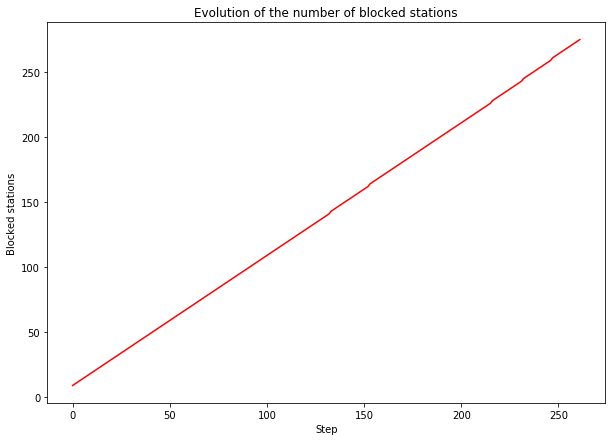

In [19]:
plt.figure(figsize = (10,7))
plt.plot(total_blocked,  c = 'r')
plt.xlabel('Step')
plt.ylabel('Blocked stations')
plt.title('Evolution of the number of blocked stations')
plt.show()

### Cascade failure simulation (directed version)

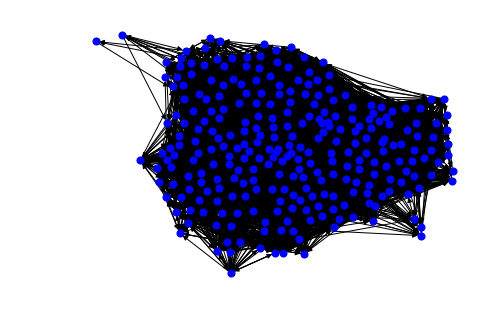

In [21]:
G_trips = nx.from_pandas_edgelist(trips_df , source='Borne de sortie', target='Borne de retour', create_using= nx.DiGraph())

node_pos,free_d = {},{}
for i,row in stations_df.iterrows():
    station = row['name']
    
    coords = row['coordinates']
    node_pos[station] = coords
    
    free = row['free']
    free_d[station] = int(free)
    


nx.set_node_attributes(G_trips, free_d, "free slots")
nx.draw(G_trips, pos=node_pos,
        node_color='b', node_size=50)

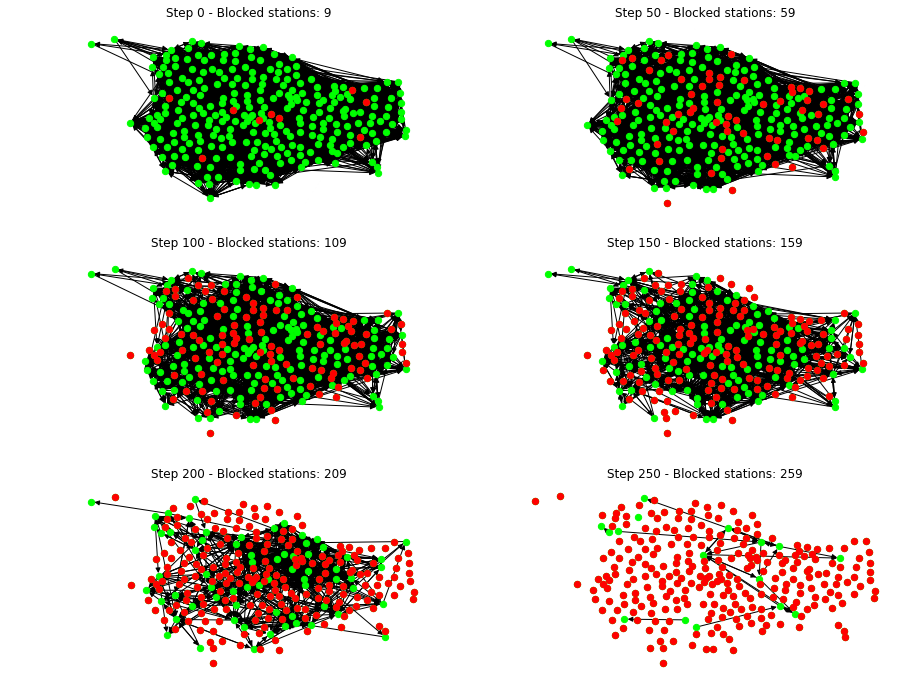

In [41]:
import random 

total_blocked = []
fig, axes = plt.subplots(3,2,figsize=(15,12))

axes_list = [axes[0][0],axes[0][1],axes[1][0],axes[1][1], axes[2][0], axes[2][1]]

#Blocking first the stations which have no free slots
blocked = [node for node in G_trips.nodes() if G_trips.node[node]['free slots'] == 0]
available_stat = list(n for n in G_trips.nodes() if n not in blocked)
total_blocked.append(len(blocked))

G_trips2 = G_trips.copy()
for b_node in blocked:
    
    #when a trip starts in a blocked station, discard it
    neighs = G_trips2.neighbors(b_node)
    G_trips2.remove_edges_from([(b_node,v) for v in neighs])
    G_trips3 = G_trips2.copy()
    
    #when a trip ends in a blocked station, send it to a random neighbor 
    for pred in G_trips3.predecessors(b_node):
        G_trips2.remove_edge(pred,b_node)
        try:
            n = random.choice(list(neighs))
            G_trips2.add_edge(pred,n)
        except:
            pass
  
        

it,count_ax = 0, 0   
nx.draw(G_trips2,pos=node_pos, node_color = 'lime', node_size = 40, ax = axes_list[count_ax])
nx.draw_networkx_nodes(G_trips2.subgraph(blocked),pos=node_pos, node_color='red', node_size=40, ax = axes_list[count_ax])
axes_list[count_ax].set_title('Step {} - Blocked stations: {}'.format(str(it),len(blocked)))
count_ax += 1   
    

while len(available_stat) != 0:
    it += 1
    
    #Block a random station
    b_node = random.choice(available_stat)
    available_stat.remove(b_node)
    blocked.append(b_node)    
    total_blocked.append(len(blocked))
    
    #when a trip starts in a blocked station, discard it
    neighs = G_trips2.neighbors(b_node)
    
    G_trips2.remove_edges_from([(b_node,v) for v in neighs])
    G_trips3 = G_trips2.copy()
    
    #when a trip ends in a blocked station, send it to a random neighbor 
    for pred in G_trips3.predecessors(b_node):
        G_trips2.remove_edge(pred,b_node)
        try:
            n = random.choice(list(neighs))
            G_trips2.add_edge(pred,n)
        except:
            pass
            
    
    
    #Showing the graph every 50 iterations
    if it % 50 == 0:
        
        nx.draw(G_trips2,pos=node_pos, node_color = 'lime', node_size = 40, ax = axes_list[count_ax])
        nx.draw_networkx_nodes(G_trips2.subgraph(blocked),pos=node_pos,
            node_color='red', node_size=40, ax = axes_list[count_ax])
        axes_list[count_ax].set_title('Step {} - Blocked stations: {}'.format(str(it),len(blocked)))
        count_ax += 1
        


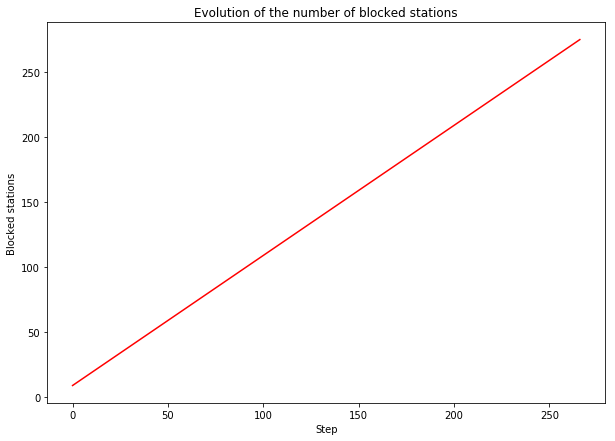

In [42]:
plt.figure(figsize = (10,7))
plt.plot(total_blocked,  c = 'r')
plt.xlabel('Step')
plt.ylabel('Blocked stations')
plt.title('Evolution of the number of blocked stations')
plt.show()

In [10]:
# your code here